In [1]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import os
%matplotlib inline

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [2]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(
    'COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml'))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    'COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml')
predictor = DefaultPredictor(cfg)

In [3]:
IMAGE_DIR = './street/'
image_path = next(os.walk(IMAGE_DIR))[2]
image_path = [x for x in image_path if not x.endswith('txt')]
image_path = random.choice(image_path)
image_path = os.path.join(IMAGE_DIR, image_path)

In [4]:
# image_path = '/home/ubuntu/Pictures/Bing/BM1759_ZH-CN2713615652_1920x1080.jpg'

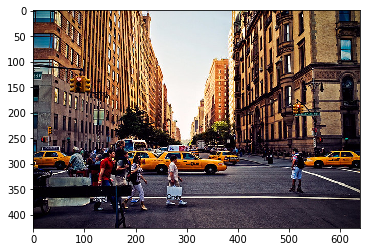

In [5]:
im = cv2.imread(image_path)
image = im[:, :, ::-1]
plt.imshow(image)

In [6]:
outputs = predictor(im)
print(outputs['instances'].pred_classes)
print(outputs['instances'].pred_boxes)

tensor([ 0,  0,  0,  2,  9,  2,  0,  2,  0, 24,  2,  2,  9,  9,  0,  2,  0,  9,
         5,  0,  9,  9,  0, 26,  0,  0,  9, 26,  9,  0,  0,  0,  9],
       device='cuda:0')
Boxes(tensor([[501.6318, 270.4211, 532.7213, 357.9077],
        [ 63.0703, 266.3758, 102.5548, 326.5121],
        [175.7702, 282.7946, 226.5964, 392.8973],
        [530.2029, 274.3725, 640.0000, 308.5714],
        [ 29.2402, 227.1922,  38.0562, 244.1710],
        [  0.0000, 274.5849,  74.8866, 310.5557],
        [262.1079, 283.2426, 294.4638, 373.6873],
        [210.1301, 275.2544, 381.1591, 323.2060],
        [124.9773, 272.0513, 162.9622, 384.5450],
        [516.1744, 283.3483, 531.7513, 310.5613],
        [342.5138, 274.6852, 401.6336, 302.2801],
        [185.9725, 275.8963, 245.1642, 302.2661],
        [ 15.2538, 248.7109,  24.7432, 259.0858],
        [ 97.2141, 131.4376, 112.5279, 161.9340],
        [155.4986, 274.5796, 191.0120, 384.6554],
        [346.5651, 268.4096, 365.8079, 281.0464],
        [418.7942, 26

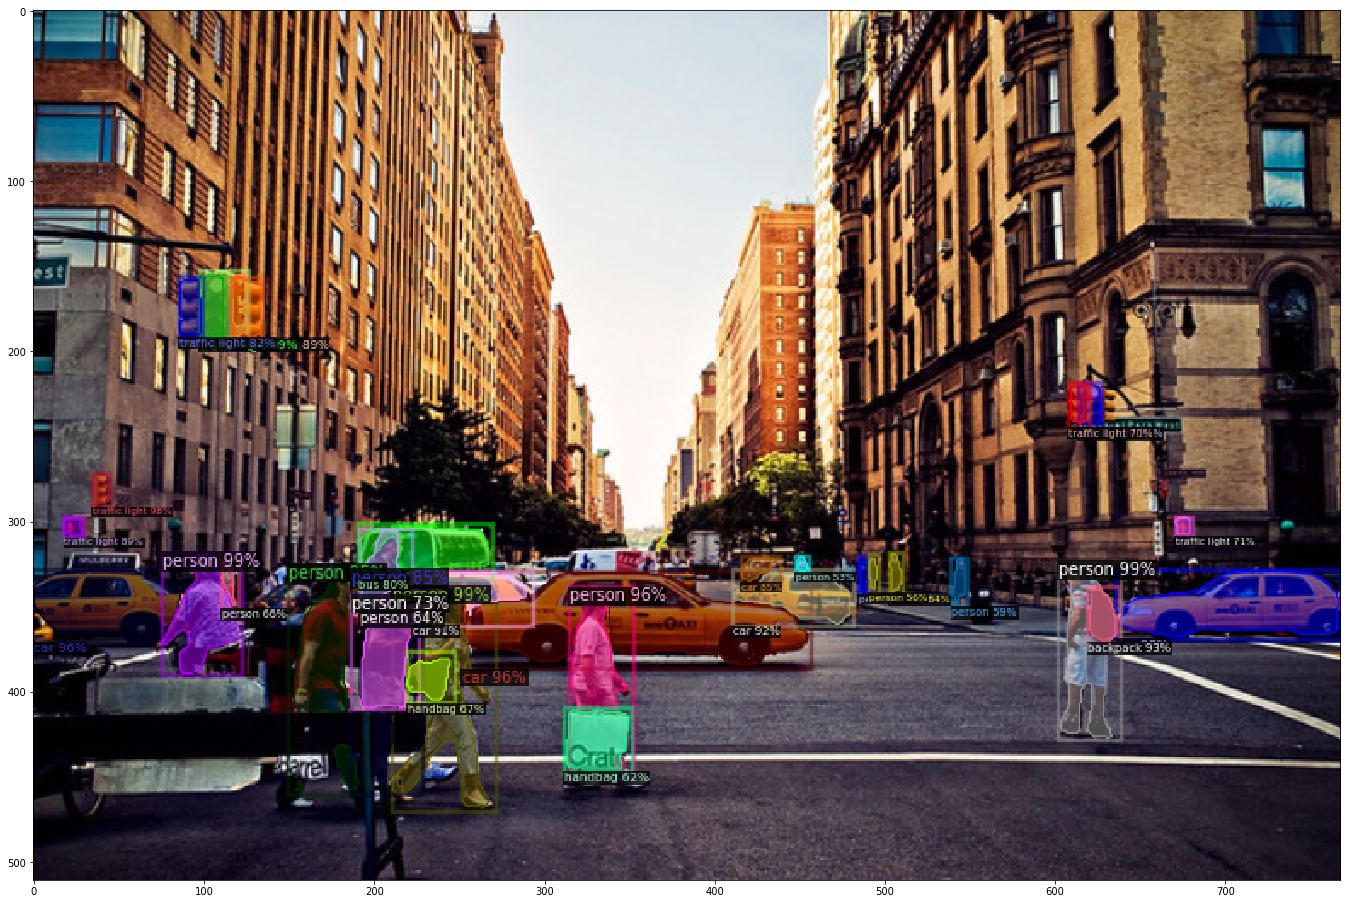

In [7]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs['instances'].to('cpu'))

plt.figure(figsize=(24, 16))
plt.imshow(v.get_image())